# 로지스틱 회귀의 하이퍼파라미터

| 파라미터 | 설명 | 값 예시 |
|---|---|---|
| `penalty` | 규제의 종류 | `None`, `l1`, `l2(기본값)`, `elasticnet` |
| `C` | 규제의 정도. 정규화 강도의 역수.<br/>값이 작을 수록 더 강한 정규화가 이루어 진다.<br/>(페널티가 강해짐=모델이 단순해짐). | `0.001`, `0.01`, `0.1`, `1`, `10`, `100`<br/>(보통 로그스케일로 지정=10배씩 커지는 형태) |

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from my_helper.classification import *

from pandas import DataFrame

# 로지스틱 회귀 모형
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### [2] 데이터 가져오기

피마 인디언 당뇨병 데이터

> https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

| 변수 | 구분 | 설명 |
|---|---|---|
| Pregnancies | 연속형 | 임신 횟수 |
| Glucose | 연속형 | 포도당 부하 검사 수치 |
| BloodPressure | 연속형 | 혈압 ($mm/Hg$) |
| SkinThickness | 연속형 | 팔 삼두근 뒤쪽의 피하지방 측정값($mm$) |
| Insulin | 연속형 | 혈청 인슐린($mu$ $U/ml$) |
| BMI | 연속형 | 체질량지수 ($(체중kg/키m)^2$) |
| DiabetesPedigreeFunction | 연속형 | 당뇨 내력 가중치 값 |
| Age | 연속형 | 나이 |
| Outcome | 명목형 | 당뇨병 유무 ($0$ 또는 $1$) |

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx", categories=['Outcome'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
None

데이터프레임 상위 5개 행
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   

>  기술통계 결과에서 Glucose, BloodPressure, SkinThickness, Insulin, BMI와 같은 값들은 `0`이 나타날 수 없는 값임에도 불구하고 최소값이 0으로 나타나고 있으므로 이상치에 대한 정제가 필요한 상태이다.
>
> 여기서는 데이터 정제 없이 진행하고 뒤에서 정제한 결과와 비교할 계획임

## #02. 전처리 없이 분류 모형 생성하기

### [1] 훈련, 검증 데이터 분리

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='Outcome', test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

### [2] 로지스틱 회귀 모형

#### (1) 하이퍼 파라미터 설정 없는 기본상태

##### 모델 생성

In [4]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##### 학습 곡선 확인

로지스틱에서 성능을 판별하기 위한 가장 간편한 지수는 `roc_auc`값이다.

이 값은 `0~1`의 범위를 갖고 값이 1에 가까울 수록 좋은 결과를 의미한다.

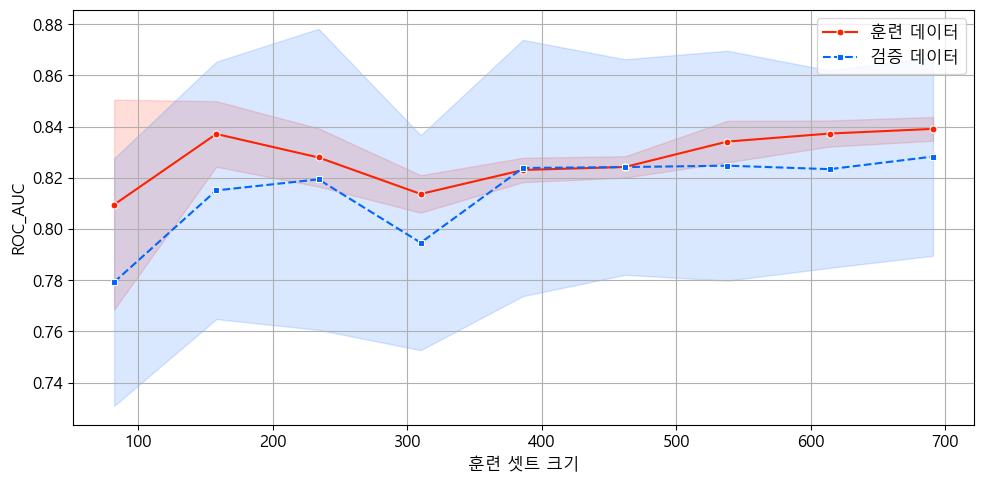

In [5]:
my_learing_curve(model, origin, yname='Outcome', dpi=100, scoring='roc_auc')

#### (2) GridSearchCV를 활용한 하이퍼파라미터 튜닝

##### 하이퍼파라미터 설정

In [6]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

##### 교차검증 수행

In [7]:
model = LogisticRegression(n_jobs=-1)

grid = GridSearchCV(model, param_grid=params, cv=10, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

##### 하이퍼파라미터의 모든 조합 목록

In [8]:
grid.cv_results_['params']

[{'C': 0.001, 'penalty': 'l1'},
 {'C': 0.001, 'penalty': 'l2'},
 {'C': 0.001, 'penalty': 'elasticnet'},
 {'C': 0.001, 'penalty': None},
 {'C': 0.01, 'penalty': 'l1'},
 {'C': 0.01, 'penalty': 'l2'},
 {'C': 0.01, 'penalty': 'elasticnet'},
 {'C': 0.01, 'penalty': None},
 {'C': 0.1, 'penalty': 'l1'},
 {'C': 0.1, 'penalty': 'l2'},
 {'C': 0.1, 'penalty': 'elasticnet'},
 {'C': 0.1, 'penalty': None},
 {'C': 1, 'penalty': 'l1'},
 {'C': 1, 'penalty': 'l2'},
 {'C': 1, 'penalty': 'elasticnet'},
 {'C': 1, 'penalty': None},
 {'C': 10, 'penalty': 'l1'},
 {'C': 10, 'penalty': 'l2'},
 {'C': 10, 'penalty': 'elasticnet'},
 {'C': 10, 'penalty': None},
 {'C': 100, 'penalty': 'l1'},
 {'C': 100, 'penalty': 'l2'},
 {'C': 100, 'penalty': 'elasticnet'},
 {'C': 100, 'penalty': None}]

##### 각 조합별 평균 score

In [9]:
grid.cv_results_['mean_test_score']

array([       nan, 0.76194969,        nan, 0.75828092,        nan,
       0.75632425,        nan, 0.75828092,        nan, 0.75821104,
              nan, 0.75828092,        nan, 0.75454228,        nan,
       0.75828092,        nan, 0.75635919,        nan, 0.75828092,
              nan, 0.75635919,        nan, 0.75828092])

##### 교차검증 결과표 만들기

In [10]:
result_df = DataFrame(grid.cv_results_['params'])
result_df['mean_test_score'] = grid.cv_results_['mean_test_score']
my_pretty_table(result_df.dropna(subset=['mean_test_score']).sort_values(by='mean_test_score', ascending=False))

+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  1 | 0.001 | l2        |           0.76195 |
|  3 | 0.001 |           |          0.758281 |
|  7 |  0.01 |           |          0.758281 |
| 11 |   0.1 |           |          0.758281 |
| 15 |     1 |           |          0.758281 |
| 19 |    10 |           |          0.758281 |
| 23 |   100 |           |          0.758281 |
|  9 |   0.1 | l2        |          0.758211 |
| 17 |    10 | l2        |          0.756359 |
| 21 |   100 | l2        |          0.756359 |
|  5 |  0.01 | l2        |          0.756324 |
| 13 |     1 | l2        |          0.754542 |
+----+-------+-----------+-------------------+


##### 최적 파라미터 확인

In [11]:
grid.best_params_

{'C': 0.001, 'penalty': 'l2'}

##### 최적 파라미터가 적용된 모델 객체

In [12]:
grid.best_estimator_

LogisticRegression(C=0.001, n_jobs=-1)

##### 최적 파라미터가 적용된 모델 객체에 대한 학습 곡선

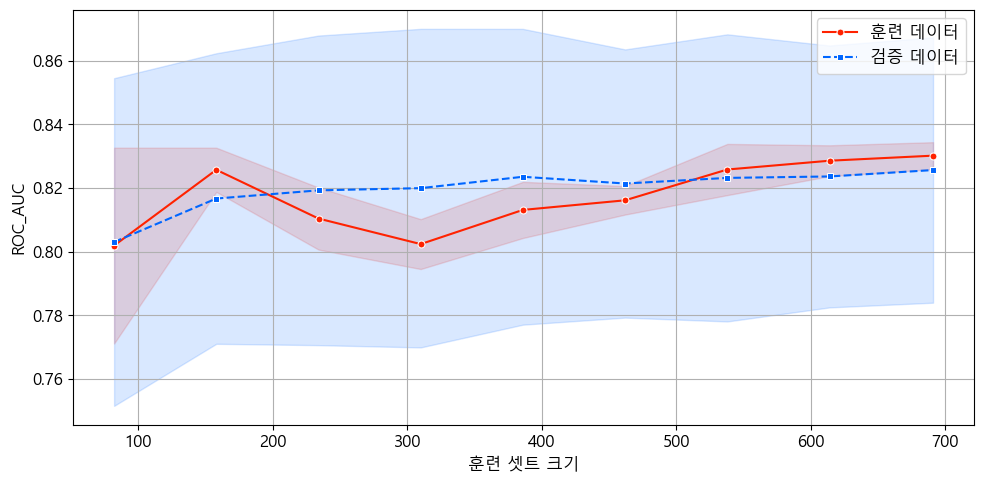

In [13]:
my_learing_curve(grid.best_estimator_, origin, yname='Outcome', dpi=100, scoring='roc_auc')

> 아직까지 최적의 모형을 찾았다고 말하기에는 어려운 상태

### [3] 모듈화 된 기능 확인

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  1 | 0.001 | l2        |          0.763621 |
| 21 |   100 | l2        |          0.761751 |
|  9 |   0.1 | l2        |          0.759917 |
| 13 |     1 | l2        |          0.757996 |
|  3 | 0.001 |           |          0.756127 |
|  7 |  0.01 |           |          0.756127 |
| 11 |   0.1 |           |          0.756127 |
| 15 |     1 |           |          0.756127 |
| 19 |    10 |           |          0.756127 |
| 23 |   100 |           |          0.756127 |
| 17 |    10 | l2        |          0.752423 |
|  5 |  0.01 | l2        |          0.745067 |
+----+-------+-----------+-------------------+



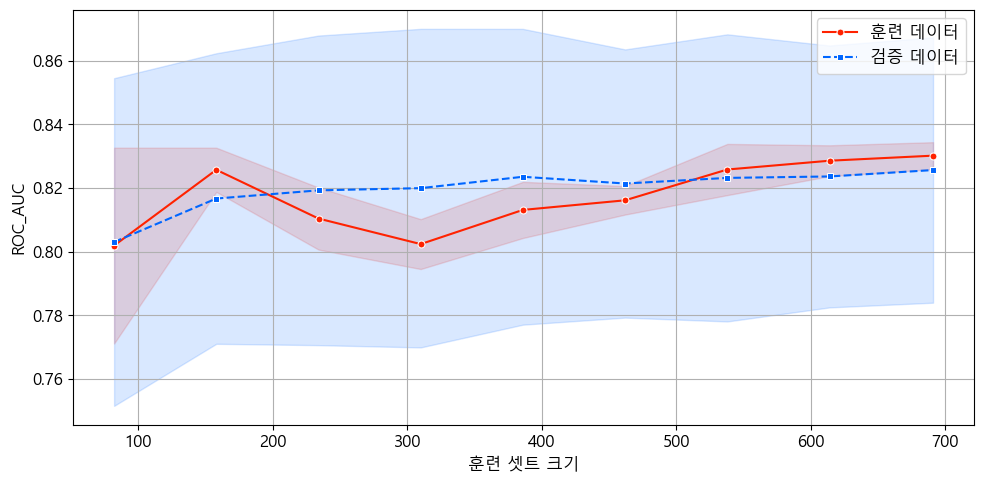

In [14]:
model = my_logistic_classification(x_train, y_train, x_test, y_test)
my_learing_curve(model, origin, yname='Outcome', dpi=100, scoring='roc_auc')

## #03. 데이터 전처리 후 분류 모형 생성

### [1] 0값을 검사할 피처명 리스트

In [15]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

### [2] `0`값의 비율 확인

In [16]:
# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
total_count = len(origin)

for feature in zero_features:
    zero_count = origin[origin[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


### [3] 0값을 평균으로 대체

#### (1) 0값을 결측치로 변환

In [17]:
df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)

#### (2) 결측치를 평균으로 대체

In [18]:
df2 = my_replace_missing_value(df)

for feature in zero_features:
    zero_count = df2[df2[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


### [4] 로지스틱 분석 수행

#### (1) 데이터 분할

In [19]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Outcome', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

#### (2) 분석

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  1 | 0.001 | l2        |          0.767173 |
|  3 | 0.001 |           |          0.765547 |
|  7 |  0.01 |           |          0.765547 |
| 11 |   0.1 |           |          0.765547 |
| 15 |     1 |           |          0.765547 |
| 19 |    10 |           |          0.765547 |
| 23 |   100 |           |          0.765547 |
|  5 |  0.01 | l2        |          0.759016 |
| 17 |    10 | l2        |          0.757444 |
|  9 |   0.1 | l2        |          0.754152 |
| 21 |   100 | l2        |          0.752526 |
| 13 |     1 | l2        |          0.747661 |
+----+-------+-----------+-------------------+



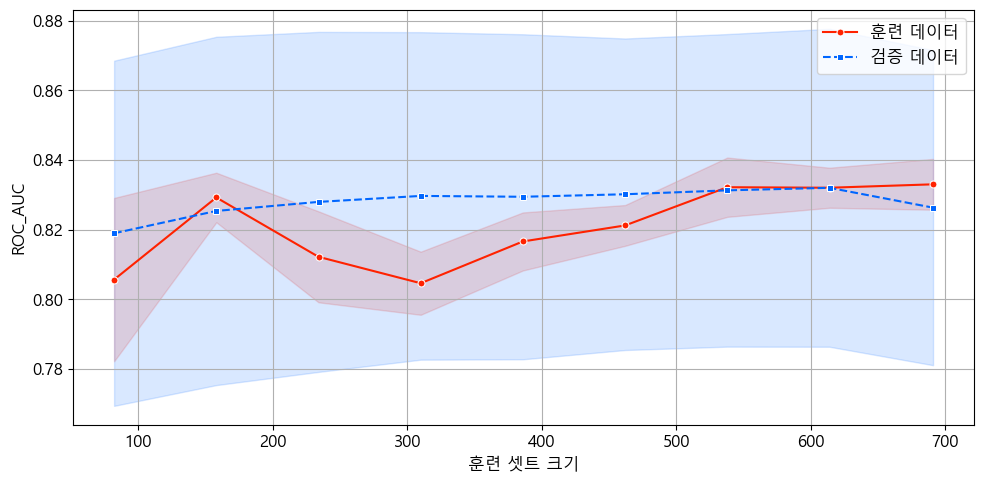

In [20]:
model = my_logistic_classification(x_train, y_train, x_test, y_test)
my_learing_curve(model, df2, yname='Outcome', dpi=100, scoring='roc_auc')

## #04. 데이터 스케일링 적용

### [1] 스케일링

In [21]:
df3 = my_standard_scaler(df2, yname='Outcome')
my_pretty_table(df3.head())

+----+---------------+-----------+-----------------+-----------------+--------------+-----------+----------------------------+------------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |      Insulin |       BMI |   DiabetesPedigreeFunction |        Age |   Outcome |
|----+---------------+-----------+-----------------+-----------------+--------------+-----------+----------------------------+------------+-----------|
|  0 |      0.639947 |  0.865108 |      -0.0335182 |        0.665502 | -3.34508e-16 |  0.166292 |                   0.468492 |      1.426 |         1 |
|  1 |     -0.844885 |  -1.20616 |       -0.529859 |      -0.0174634 | -3.34508e-16 | -0.852531 |                  -0.365061 |  -0.190672 |         0 |
|  2 |       1.23388 |   2.01581 |       -0.695306 |     8.08794e-16 | -3.34508e-16 |  -1.33283 |                   0.604397 |  -0.105584 |         1 |
|  3 |     -0.844885 |  -1.07465 |       -0.529859 |       -0.700429 |    -0.724389 | -0

### [2] 데이터 분할

In [22]:
x_train, x_test, y_train, y_test = my_train_test_split(df3, yname='Outcome', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### [3] 모델 구현

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  9 |   0.1 | l2        |          0.772065 |
| 13 |     1 | l2        |          0.767186 |
|  3 | 0.001 |           |          0.765547 |
|  7 |  0.01 |           |          0.765547 |
| 11 |   0.1 |           |          0.765547 |
| 15 |     1 |           |          0.765547 |
| 17 |    10 | l2        |          0.765547 |
| 19 |    10 |           |          0.765547 |
| 21 |   100 | l2        |          0.765547 |
| 23 |   100 |           |          0.765547 |
|  5 |  0.01 | l2        |          0.755738 |
|  1 | 0.001 | l2        |          0.657977 |
+----+-------+-----------+-------------------+



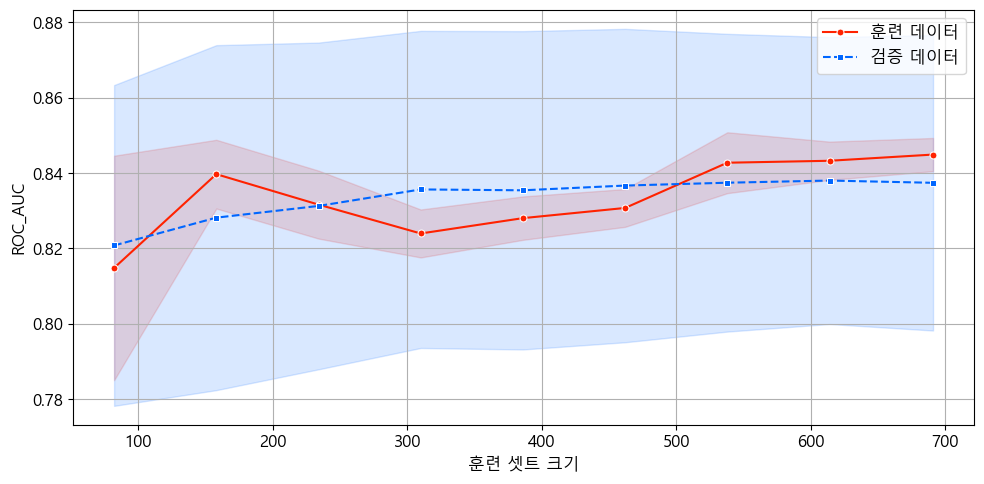

In [23]:
model = my_logistic_classification(x_train, y_train, x_test, y_test)
my_learing_curve(model, df3, yname='Outcome', dpi=100, scoring='roc_auc')